<h1> Which bands merch is <i>most</i> valuable? </h1>

So the question I'm seeking to explore is if there is any sort of rhyme or reason as to which band's merch has become more valuable than the others. Is it the ones we all think of? Is the rarity of merch from other lesser known bands equivalent because of the rarity? What overall wins out here? 

In [168]:
#Import some modules to get started:
import requests
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
import pandas as pd

To do this I originally wanted to scrape eBay for completed listings. This turned out to be a horrible idea thanks to a lot of sellers who put keywords in their listing title and description that don't actually relate to the item they're selling. For example, when you search for "The Clash" you might actually get a shirt that's for "The Cramps" but because not as many people know The Cramps, they append their listings with "The Clash" so that it shows in search results for the Clash hoping to get more money. That was a very circular explination, but I'm sure most people who have used ebay in the past know what I'm talking about. I spent a weekend trying to figure out a way to clean up this data without manually going through it before mashing shift + delete at 3am on all of the CSV files and the jupyter notebook I was using in frustration.


So change of scope. I've found a site that lists authentic vintage shirts for sale called wycovintage. Like most vintage sites they're a bit overpriced, but we should be able to extract some semblance of value out of the prices set. I'm also no longer limiting this to punk bands since I'm going to quickly scrape all of the roughly 1900 artist related items and do some general analysis. I've taken a base URL which I'm appending to crawl through the site and grab this data and we will output it into a CSV file for safe keeping after a bit of data manipulation.

In [125]:
# Setup the BaseURL and Headers to stop the site from blocking me from scraping it.
# Also need to set up some lists to store data outside the scraping loop
baseurl = 'https://wycovintage.com/product-category/artists/page/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
pName = []
pPrice = []
pUrl = []

Below is the main webcrawling/scraping loop. This iterates on the baseURL and pulls the product name, product, price, and product URL into 3 seperate lists. I'll do some additional formatting after based on these things, but for now this is the data that I want to collect from the site.

In [126]:
# Start loop, knowing that there are 63 pages total to scrape
# Sleep 5 seconds to prevent blocking and to be nice to their server
# Print output of URL being scraped and last item added to list to know that I'm not being blocked.
for i in range(1,64):
    url = baseurl + str(i) + '/'
    print(url)
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    items = soup.find_all('span', {'class': 'gtm4wp_productdata'})
    for item in items:
        pName.append(item['data-gtm4wp_product_name'])
        pPrice.append(item['data-gtm4wp_product_price'])
        pUrl.append(item['data-gtm4wp_product_url'])
    print(pName[-1] + ' ' + pPrice[-1] + ' ' + pUrl[-1])
    time.sleep(5)

https://wycovintage.com/product-category/artists/page/1/
1999 Black Sabbath Reunion Tour Shirt 150 https://wycovintage.com/product/1999-black-sabbath-reunion-tour-shirt/
https://wycovintage.com/product-category/artists/page/2/
1995 Jimmy Page Robert Plant No Quarter Zoso Tour Shirt 75 https://wycovintage.com/product/1995-jimmy-page-robert-plant-no-quarter-zoso-tour-shirt/
https://wycovintage.com/product-category/artists/page/3/
1980s Pink Floyd Dark Side Of The Moon Shirt 150 https://wycovintage.com/product/1980s-pink-floyd-dark-side-of-the-moon-shirt-3/
https://wycovintage.com/product-category/artists/page/4/
1997 Rolling Stones Voodoo Lounge Tour Crew Shirt 75 https://wycovintage.com/product/1997-rolling-stones-voodoo-lounge-tour-crew-shirt/
https://wycovintage.com/product-category/artists/page/5/
1989 Rolling Stones Steel Wheels Tour Shirt 135 https://wycovintage.com/product/1989-rolling-stones-steel-wheels-tour-shirt-29/
https://wycovintage.com/product-category/artists/page/6/
1994

https://wycovintage.com/product-category/artists/page/47/
1976 Sammy Hagar Capitol Records Promo Shirt 200 https://wycovintage.com/product/1976-sammy-hagar-capitol-records-promo-shirt-2/
https://wycovintage.com/product-category/artists/page/48/
1989 Ratt Reach For The Sky Tour Shirt 350 https://wycovintage.com/product/1989-ratt-reach-for-the-sky-tour-shirt-2/
https://wycovintage.com/product-category/artists/page/49/
1995 Grateful Dead Fare Thee Well Tie Dye Shirt 135 https://wycovintage.com/product/1995-grateful-dead-fare-thee-well-tie-dye-shirt/
https://wycovintage.com/product-category/artists/page/50/
1979 Kiss Live in Concert Shirt 200 https://wycovintage.com/product/1979-kiss-live-in-concert-shirt/
https://wycovintage.com/product-category/artists/page/51/
1991 ACDC Teacher's Pet Shirt 150 https://wycovintage.com/product/1991-acdc-teachers-pet-shirt-3/
https://wycovintage.com/product-category/artists/page/52/
1980 Rock N Roll Marathon Shirt 125 https://wycovintage.com/product/1980-r

<h3>Adding Years</h3>
I want to go ahead and grab the years from the first part of the item description, so that we can use that to group by, and get an overall trend line when comparing price to year.

In [127]:
# Now lets do some work and break out the years, ignoring the 's' on years that exact is unknown.
# First make a copy of the data so we don't have to scrape again
pNameTemp = pName
years = []
for item in pNameTemp:
    years.append(item[:4])

Now that we've added years, I want to strip those years out of the product description since I no longer need them. A simple loop is going to accomplish this, however this should only be run once. I have commented out the data manipulation pieces here, since I didn't want to run them accidentally.

In [128]:
# Let's strip the year out of the name data.
# ONLY RUN THIS ONCE. Disabled here so as to not damage data.
index = 0
while index < len(pNameTemp):
    if 's' in (pNameTemp[index][:5]):
        #pNameTemp[index] = pNameTemp[index][6:]
    else:
        #pNameTemp[index] = pNameTemp[index][5:]
    index += 1

Bruce Springsteen Born In The USA Tour Shirt
Rolling Stones Steel Wheels Tour Shirt
Steve Miller Band The Joker Promo Shirt
Eagles Watch Dogg Tour Shirt
Nirvana Incesticide Shirt
Live Aid This Shirt Saves Lives Shirt
Queen The Works Shirt
Rolling Stones Voodoo Lounge Tour Shirt
Janet Jackson Shirt
Cheap Trick Shirt
The Who My Generation Kids Alright Tour Shirt
Stevie Nicks Rock A Little Tour Shirt
Cheap Trick Next Position Please Tour Shirt
Cheap Trick Dream Police Tour Jersey Shirt
Kiss Hot In The Shade Tour Jersey Shirt
The Clash Out Of Control Tour Shirt
Foghat Tight Shoes Tour Jersey Shirt
Neil Young Transworld Tour Shirt
Nine Inch Nails Downward Spiral Shirt
Michael Bolton Timeless Tour Shirt
Ozzfest Black Sabbath Concert Shirt
Nine Inch Nails God Damn This Noise Long Sleeve Shirt
Ozzy Osbourne Blizzard Of Ozz Shirt
Rolling Stones Voodoo Lounge Tour Shirt
Elton John The World Tour Shirt
Ozzy Osbourne Crew Tour Shirt
Cheap Trick Tour Shirt
Sammy Hagar Red Rock Tour Shirt
Rolling St

Clash Give 'Em Enough Rope Shirt
Electric Light Orchestra Time Tour Shirt
Guns N Roses Pretty Tied Up Euro Tour Shirt
Lynyrd Skynyrd Gimme Back My Bullets Tour
Styx Grand Decathlon Tour Shirt
Black Sabbath Party Ninjas Shirt
Bob Dylan World Tour Shirt
Metallica Breaking Sound Festival Shirt
Stryper The Yellow And Black Attack Shirt
Diana Ross Workin Overtime Shirt
The Who Kids Are Alright Tour Shirt
Guns N Roses Use Your Illusion Tour Shirt
Paul McCartney Berkley Staff Shirt
Lollapalooza Butthole Surfers Shirt
Guns N Roses Use Your Illusion Tour Shirt
Meat Loaf Neverland Express Tour Shirt
Styx The Grand Decathlon Shirt
Cheap Trick 4th Of July Jam Shirt
Journey Evolution Promo Shirt
Iron Maiden Somewhere In Time Shirt
Bruce Springsteen Born In The USA Tour Shirt
Billy Joel 52nd Street Tour Shirt
Bruce Springsteen Born In The USA Tour Shirt
Megadeth Monsters Of Rock Euro Tour All Over Print Shirt
Frank Zappa Them Or Us Tour Shirt
Grateful Dead Europe Shirt
Rod Stewart Faces Shirt
Beatle

<h3>Adding a Bands category</h3>
I realized that I should have tried to scrape this information a bit to late. No problems however, since a big loop can solve this for me, and allow me more control over the Bands that I actually want data on. I picked some of the more well known bands and a smattering of personal favorites for analysis later.

In [291]:
# Need to create one more column using a list here
pBand = []
for item in pNameTemp:
    if 'Springsteen' in item:
        pBand.append('Springsteen')
    elif 'Iron Maiden' in item:
        pBand.append('Iron Maiden')
    elif 'Rolling Stones' in item:
        pBand.append('Rolling Stones')
    elif 'Clash' in item:
        pBand.append('The Clash')
    elif 'Metallica' in item:
        pBand.append('Metallica')
    elif 'Guns N Roses' in item:
        pBand.append('Guns N Roses')
    elif 'Van Halen' in item:
        pBand.append('Van Halen')
    elif 'Nirvana' in item:
        pBand.append('Nirvana')
    elif 'Led Zeppelin' in item:
        pBand.append('Led Zeppelin')
    elif 'Pink Floyd' in item:
        pBand.append('Pink Floyd')
    elif 'Grateful Dead' in item:
        pBand.append('Grateful Dead')
    elif 'Bad Brains' in item:
        pBand.append('Bad Brains')
    elif 'Ozzy' in item:
        pBand.append('Ozzy')
    elif 'Motorhead' in item:
        pBand.append('Motorhead')
    elif 'Gwar' in item:
        pBand.append('Gwar')
    elif 'Ramones'in item:
        pBand.append('Ramones')
    elif 'Misfits' in item:
        pBand.append('Misfits')
    elif 'Fugazi' in item:
        pBand.append('Fugazi')
    else:
        pBand.append('Other')


<h3>Making the CSV</h3>
At this point, I want to save the results of my webcrawling/scraping since I don't want to have to do this work again. I go over a few options below in my comments, but overall I chose to just go ahead and make a dataframe using pandas, and then export that as it seems the simplest option

In [258]:
# I could make a loop here to create the CSV manually, or I could create a dictonary or a tuple here to import 
# into Pandas but importing the lists directly into pandas is easier, creates a df object for me to work with
# going forward and allows an easy export to a CSV file
df = pd.DataFrame()
df['Year'] = years
df['Shirt'] = pNameTemp
df['Price'] = pPrice
df['Url'] = pUrl
df['Band'] = pBand
# Lets save this to a csv for safe keeping now
df.to_csv('shirt_data.csv', index=False)

Given that the data is bound to change since it's a retail site, I've included a CSV file that I'm using going forward (shirt_data1.csv) for visualizations/analysis since if you were to scrape the site, the results could be different.

In [259]:
# Going to work off of the saved data now, since it eliminates inconsistancies between what we might see if we
# were to scrape at different times.
df = pd.read_csv('shirt_data1.csv')
df.head()

,Year,Shirt,Price,Url,Band
0,1984,Bruce Springsteen Born In The USA Tour Shirt,150.0,https://wycovintage.com/product/1984-bruce-spr...,Springsteen
1,1989,Rolling Stones Steel Wheels Tour Shirt,125.0,https://wycovintage.com/product/1989-rolling-s...,Rolling Stones
2,1973,Steve Miller Band The Joker Promo Shirt,250.0,https://wycovintage.com/product/1973-steve-mil...,Other
3,1994,Eagles Watch Dogg Tour Shirt,100.0,https://wycovintage.com/product/1994-eagles-wa...,Other
4,1992,Nirvana Incesticide Shirt,1000.0,https://wycovintage.com/product/1992-nirvana-i...,Nirvana


<h3>General Analysis</h3>
Two things I was interested in given the dataset was the overal trend of "value" based on year, and during which years most of the invetory falls in. I used a scatterplot with a trend line for the first question, and a distrobution plot to show year.

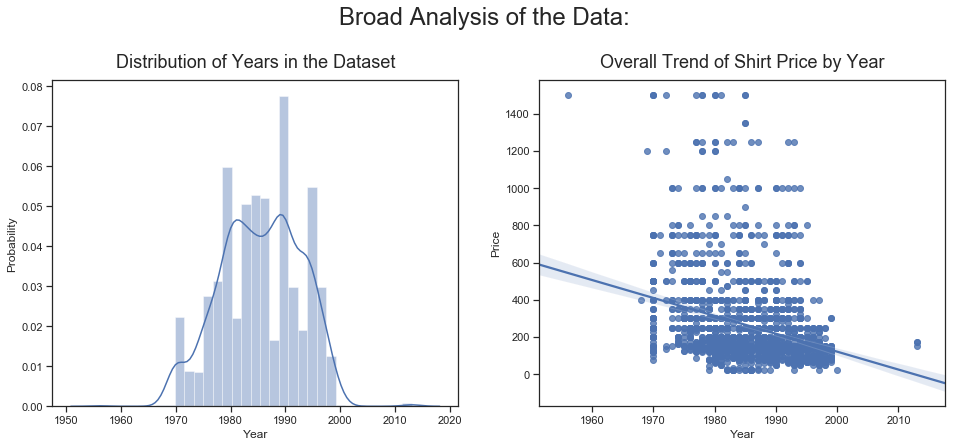

In [314]:
#Overall Trend of Price by year
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.suptitle("Broad Analysis of the Data:", fontsize=24, y=1.05)


ax[1].set_title("Overall Trend of Shirt Price by Year", fontsize=18, y=1.02)
sns.regplot(x='Year', y='Price', data=df[df['Price']<=1500], ax=ax[1])
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Price")

ax[0].set_title("Distribution of Years in the Dataset", fontsize=18, y=1.02)
sns.distplot(df.Year, ax=ax[0])
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Probability");

So some interesting stuff here. Looking at the distribution plot, we can generally see that the start of the Band T-Shirt trend was in the 70s, I'm guessing due to Led Zeppelin. It most certainly took off in the 80s, as we see a large number of shirts during those years, however we have to keep in mind that we're looking at a retail store's dataset and that <i>could</i> just be representitive of what sells or what's easy to get a hold of. Overall though I think it's safe to say that Band shirts overall started in the 70s, took off in the 80s, and overall have remained successful to today.

Looking at the trend line of Price vs Year, it's about what you would expect. Overall trending downward the closer you get to the present day, which I would expect given the rarity of clothing from the 70s being passed down.

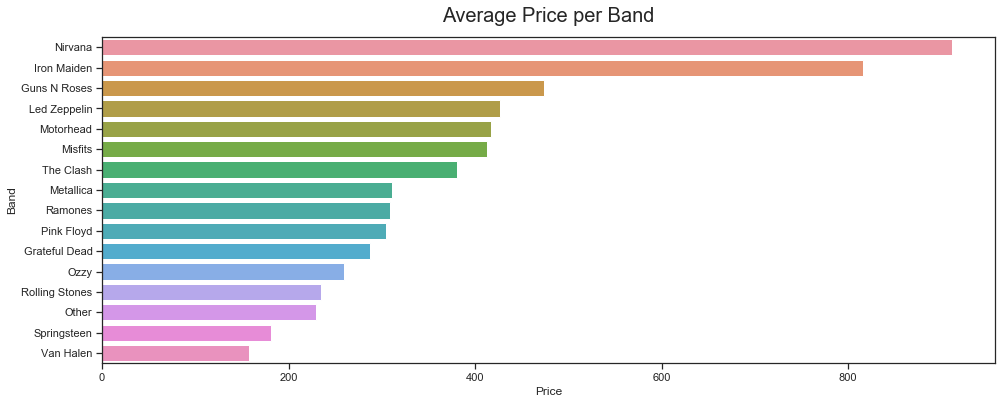

In [328]:
# I want to display results in descending order. The easiest way to do this is to create a new dataframe that
# both rounds the mean to 2 decimals and then is able to be sorted in descending order. Then use this new 
# dataframe in the plot.
new_df = df.groupby(['Band'], as_index=False)['Price'].agg('mean').round(2)
new_df = new_df.sort_values(['Price'], ascending=False).reset_index(drop=True)
plt.figure(figsize=(16, 6))
sns.barplot(x='Price', y='Band', data=new_df)
plt.title('Average Price per Band', fontsize='20', pad=15);

<h3>Most Valuable Band</h3>
As I noted in my comments above, I wanted to display this data sorted in descending order, so I created a new dataframe and sorted it.

And the award goes to...Nirvana. At least out of the bands that I chose to limit this to, they're the clear winner. Overall, a lot of bands came in around where I thought they might. Iron Maiden, Zeppelin, and Motorhead I thought would make strong showings and they did. Guns N Roses suprises me quite a bit coming in 3rd though, I find that a bit unexpected. The Misfits place the highest as far as punk bands go beating out the Clash and the Ramones, both bands I think of as better known. Springsteen seems a little suprising to me, although if you look at his merch, it's not exactly stuff I would want to wear. The other explination that I can come up with is that the bottom half of this list (Springsteen, the Stones, Ozzy, and the Dead) all tour RELENTLESSLY, and as such likely have more tour merch out there in the world...and a lot of bad, dated designs that people don't want to wear. 